Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5498 - loss: 1.2857 - val_accuracy: 0.4740 - val_loss: 5.7861
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.5754 - loss: 0.8449 - val_accuracy: 0.4960 - val_loss: 0.9030
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.5833 - loss: 0.8363 - val_accuracy: 0.4980 - val_loss: 1.0555
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.5875 - loss: 0.7526 - val_accuracy: 0.5080 - val_loss: 0.8513
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6408 - loss: 0.6631 - val_accuracy: 0.5550 - val_loss: 0.7371
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6294 - loss: 0.6782 - val_accuracy: 0.5360 - val_loss: 0.7924
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.6347 - loss: 0.6731 - val_accuracy: 0.6280 - val_loss: 0.6572
Epoch 8/10
63/63 ━━━━━━━━━━

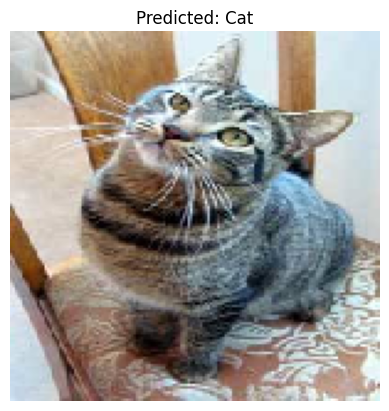

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Download and extract dataset (Dogs vs. Cats from Kaggle or a similar dataset)
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = keras.utils.get_file("cats_and_dogs_filtered.zip", dataset_url, extract=True)
data_dir = os.path.join(os.path.dirname(zip_path), "cats_and_dogs_filtered")

# Set training and validation directories
train_dir = os.path.join(data_dir, "train")
validation_dir = os.path.join(data_dir, "validation")

# Data Preprocessing using ImageDataGenerator with Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

# Build CNN Model with Dropout and Batch Normalization
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {test_acc:.2f}")

# Test prediction on a new image
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    print("Prediction:", "Dog" if prediction > 0.5 else "Cat")
    plt.imshow(img)
    plt.title("Predicted: Dog" if prediction > 0.5 else "Predicted: Cat")
    plt.axis('off')
    plt.show()

# Example usage (Change the image path to an actual image from your dataset)
example_image_path = os.path.join(train_dir, "cats", random.choice(os.listdir(os.path.join(train_dir, "cats"))))
predict_image(example_image_path, model)